In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Fire_dataset_cleaned.csv')

In [3]:
dataset.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [5]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.drop(['Region'], axis=1, inplace=True)

In [6]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [7]:
df = dataset.copy()

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [11]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [12]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [13]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [16]:
df.Classes.value_counts()

,count
Classes,
fire,137
not fire,106


In [17]:
df = df.drop(['day','month','year'], axis=1)

In [18]:
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [19]:
df.Classes.value_counts()

,count
Classes,
1,137
0,106


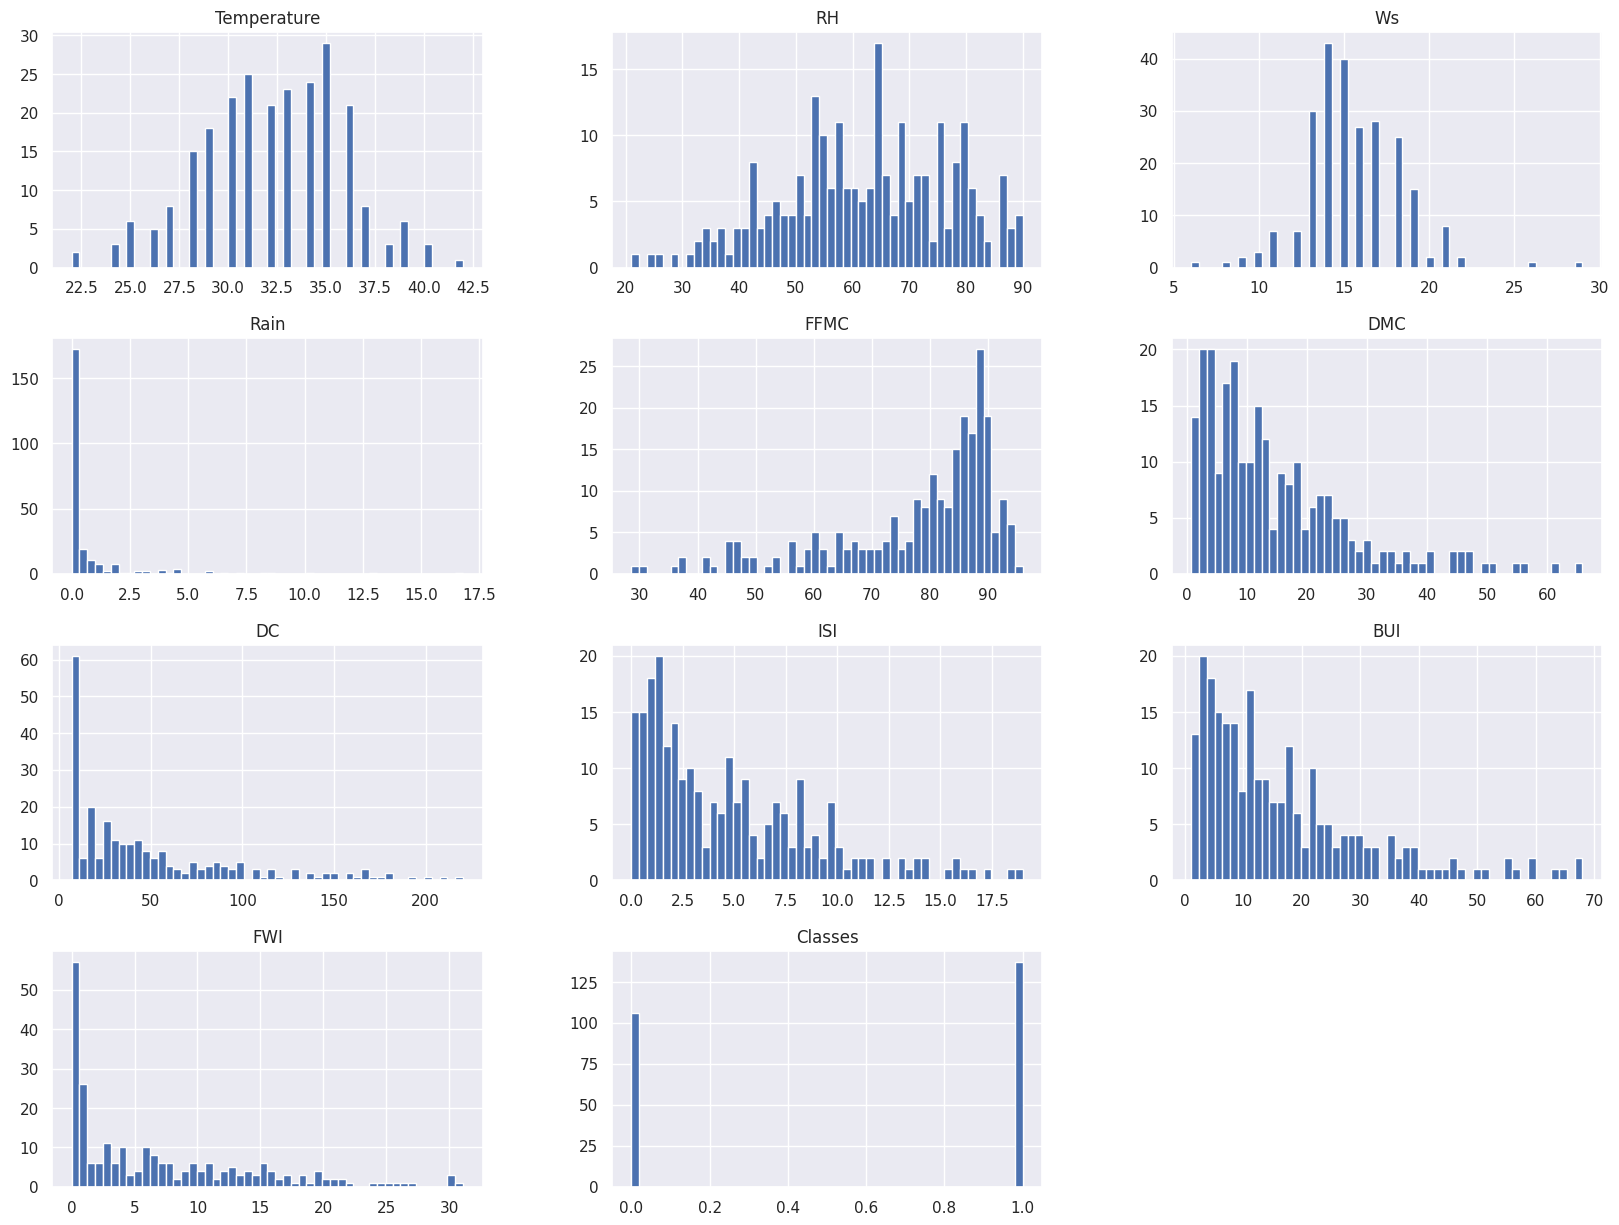

In [21]:
sns.set_theme(style="darkgrid")
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [22]:
percentage = df.Classes.value_counts(normalize=True)*100
percentage

,proportion
Classes,
1,56.378601
0,43.621399


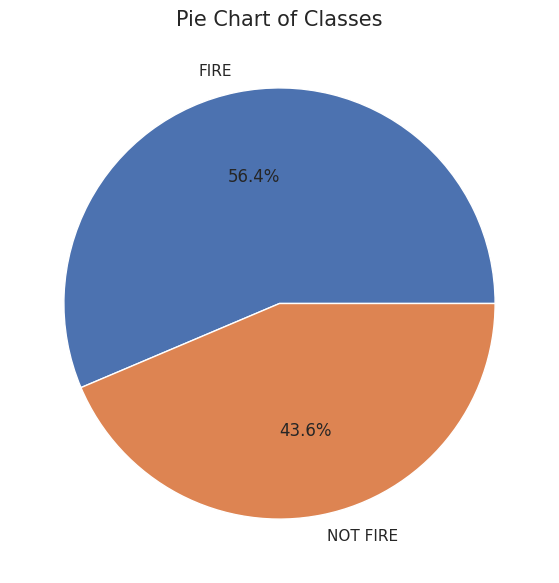

In [23]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

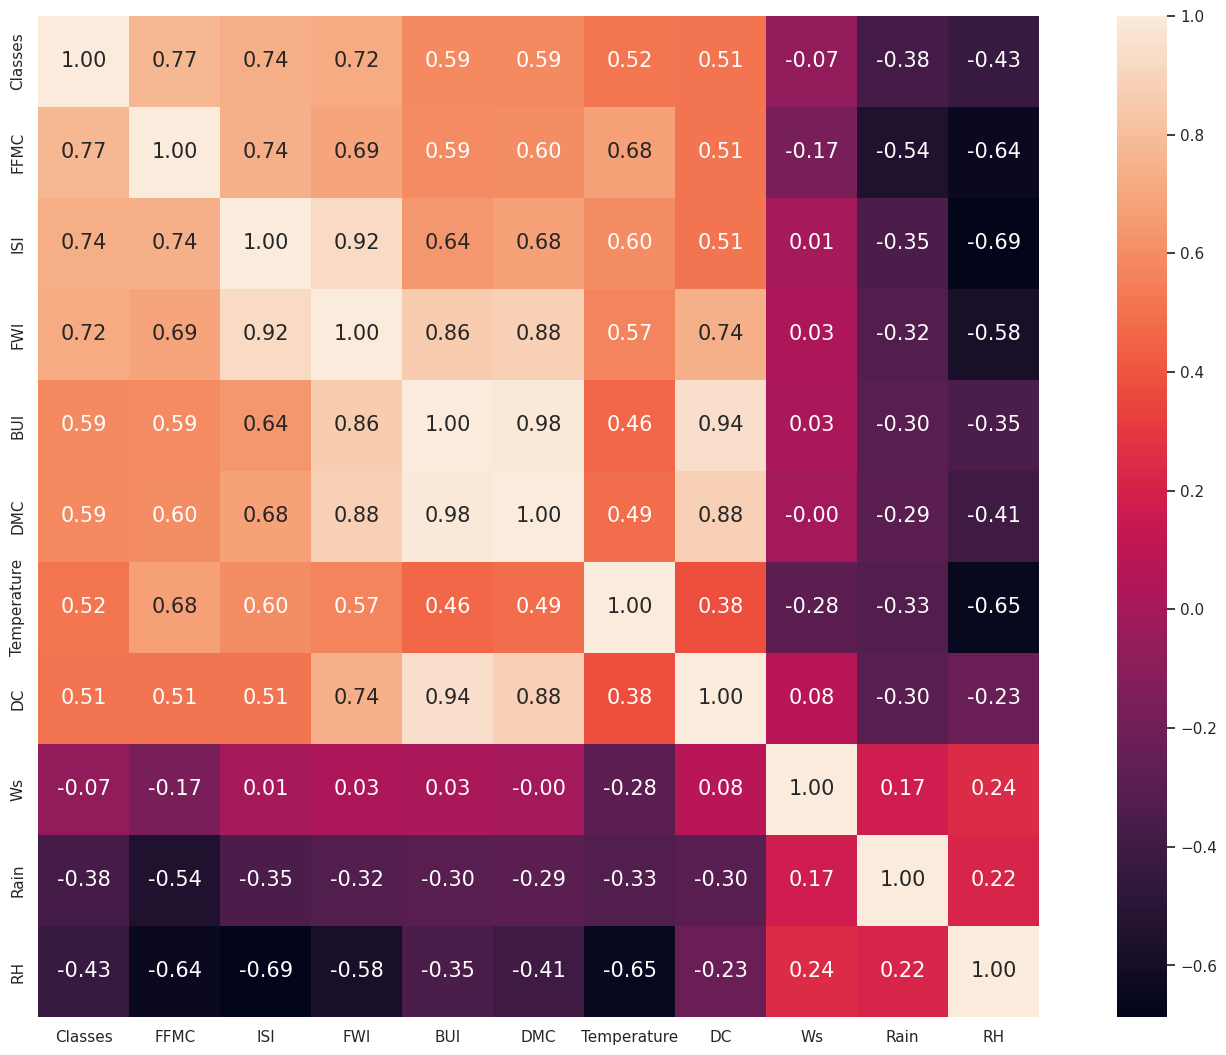

In [26]:
# Correlation chart
k = len(df.columns)
corr = df.corr()
cols = corr.nlargest(k, 'Classes')['Classes'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

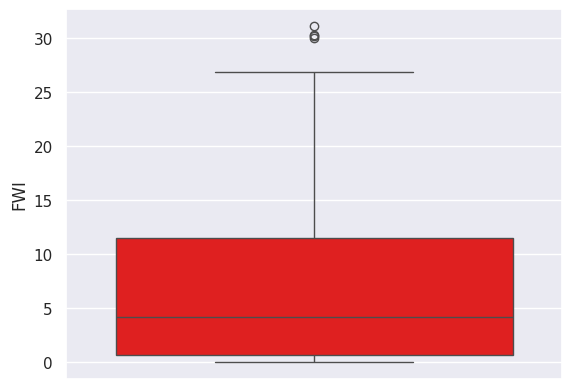

In [27]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

In [31]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

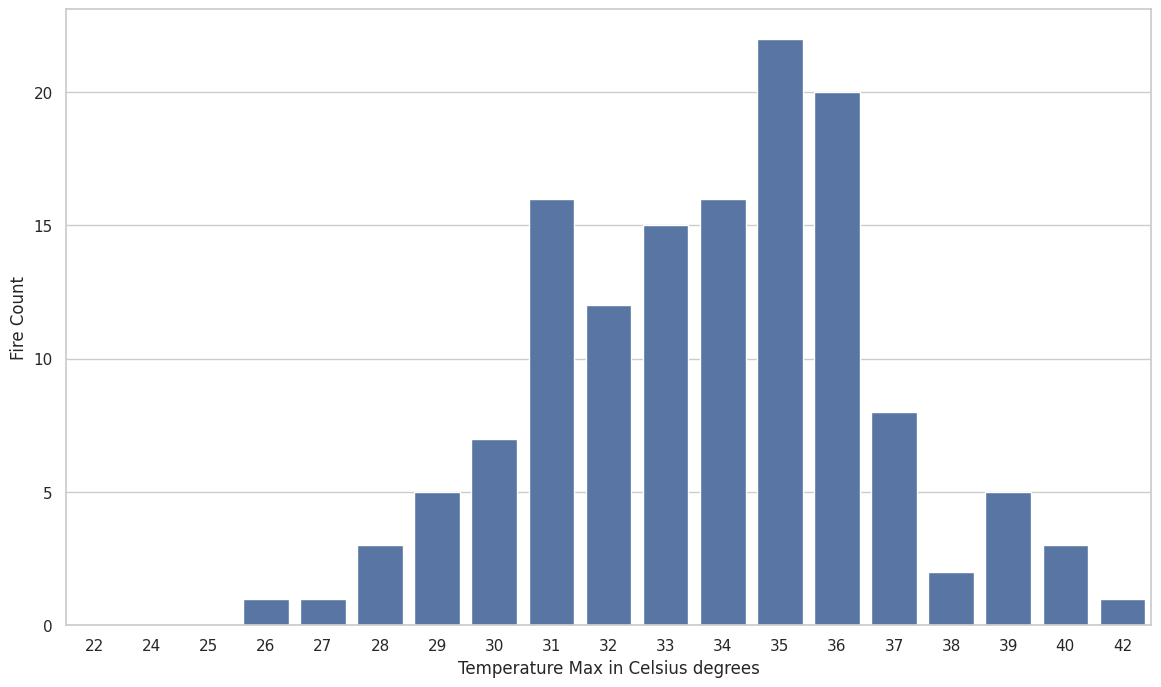

In [32]:
barchart('Temperature','Temperature Max in Celsius degrees')

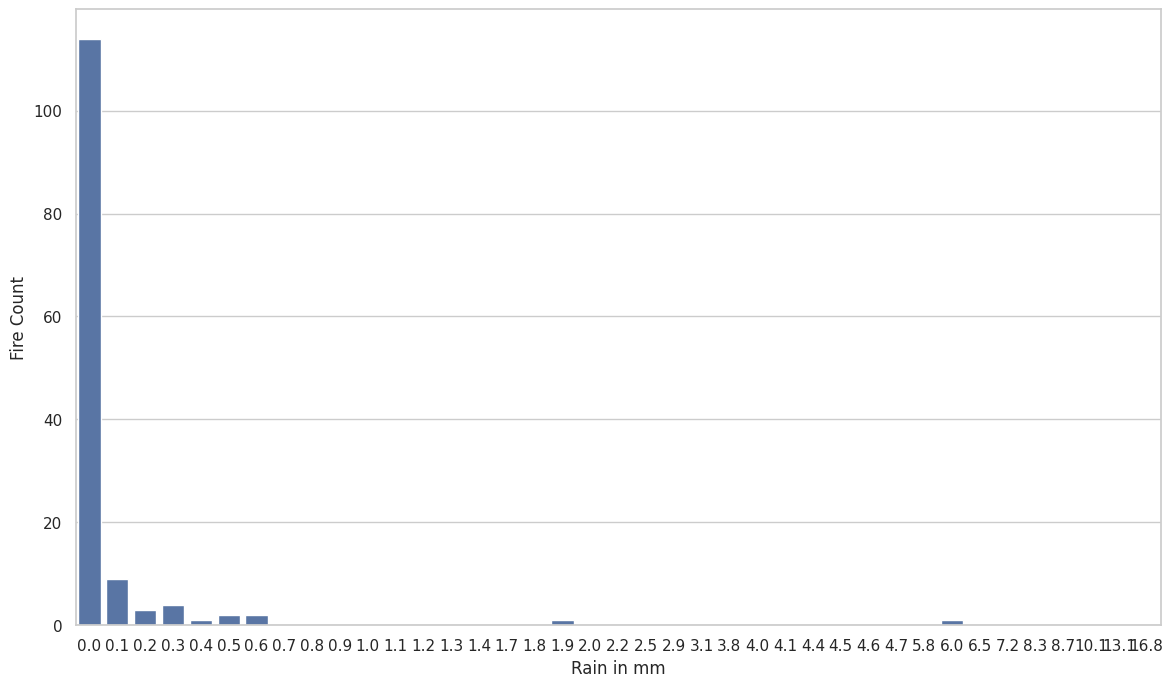

In [33]:
barchart('Rain', 'Rain in mm')

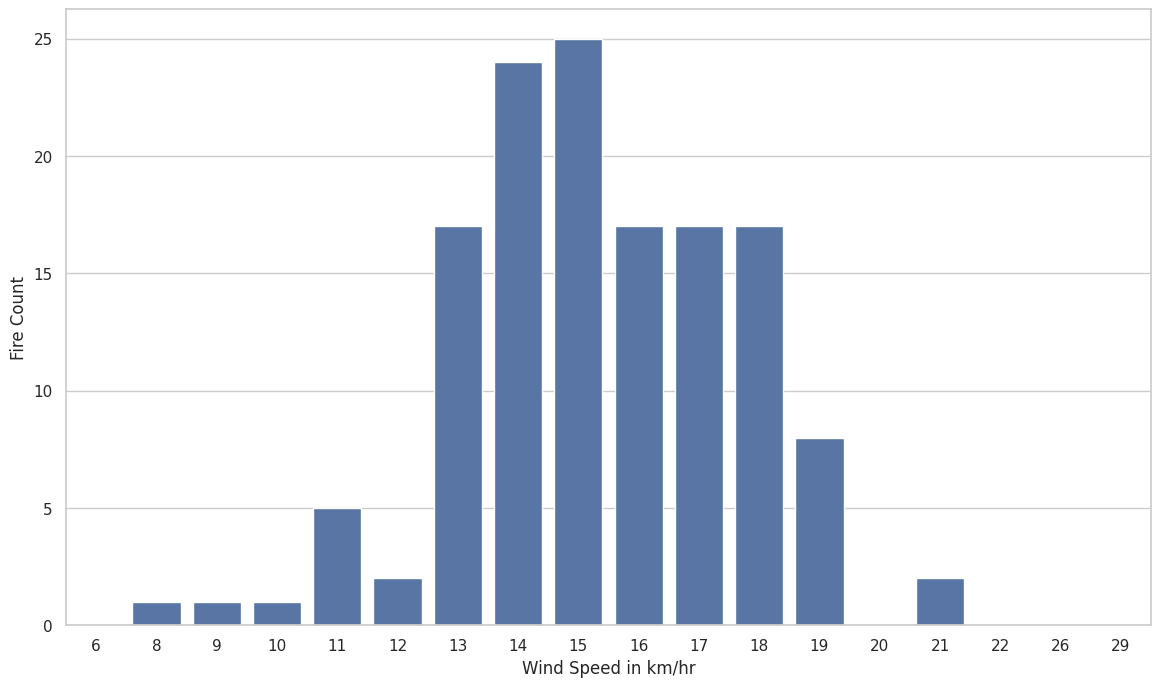

In [34]:
barchart('Ws', 'Wind Speed in km/hr')

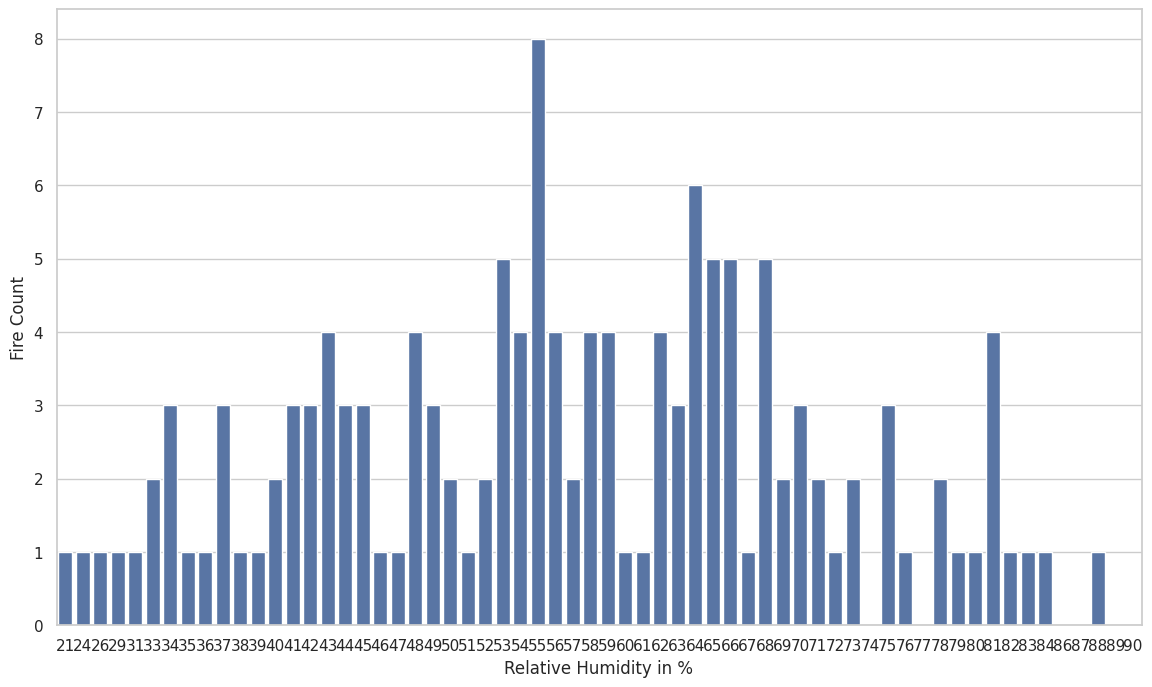

In [36]:
barchart('RH','Relative Humidity in %')

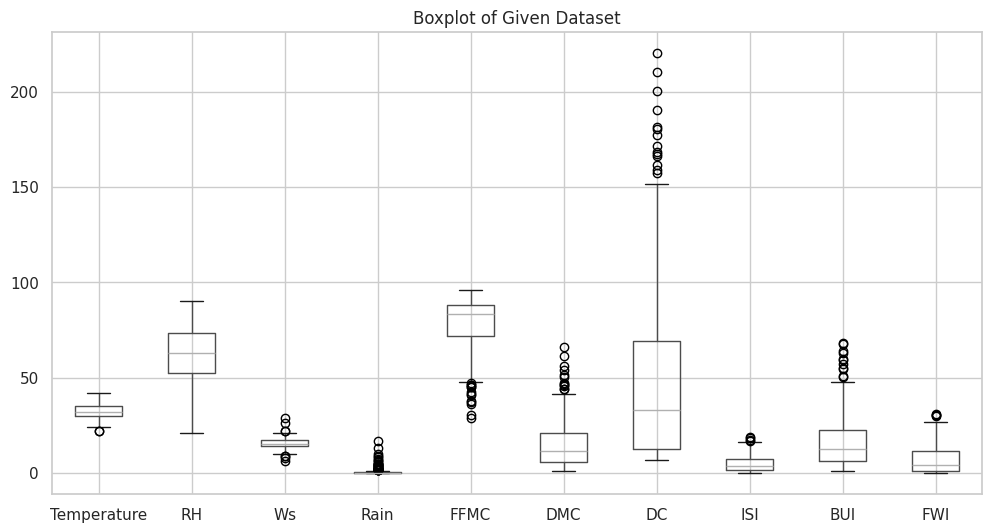

In [38]:
dftemp = df.drop(['Classes'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

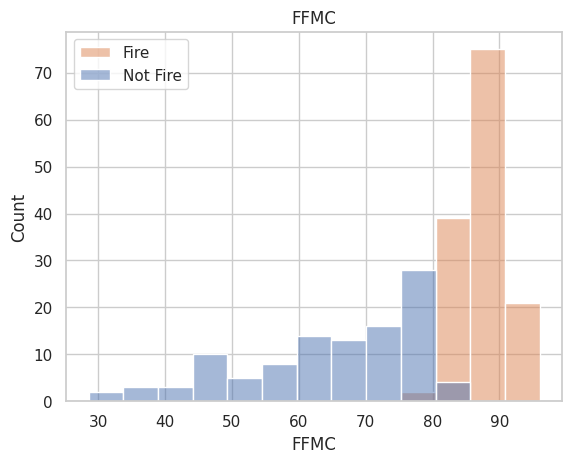

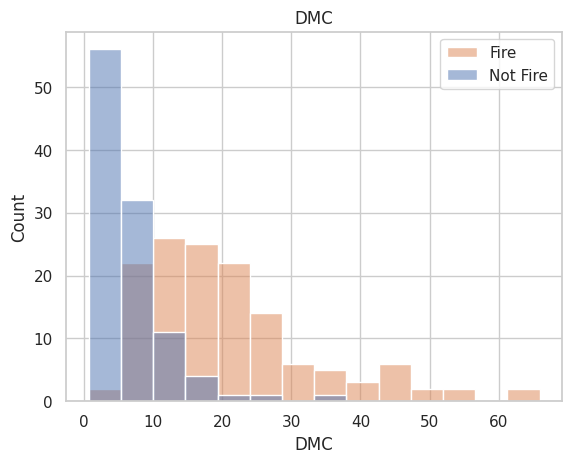

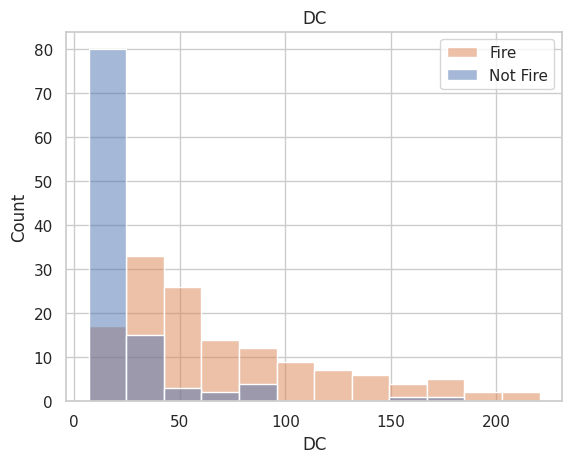

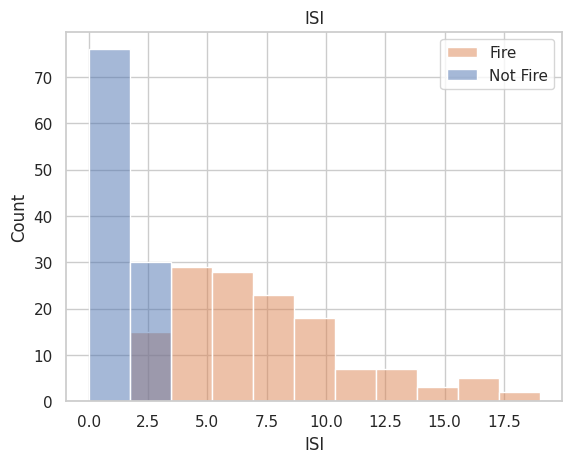

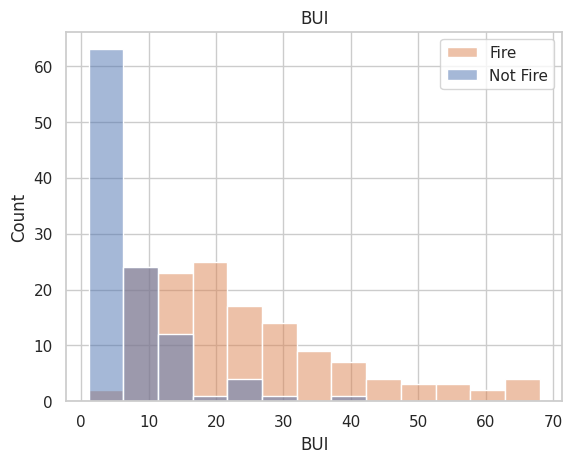

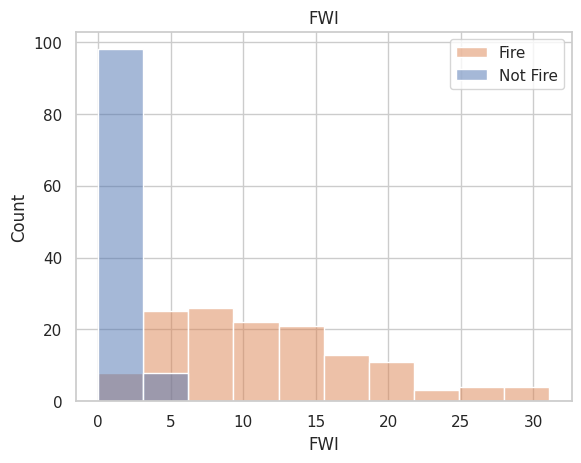

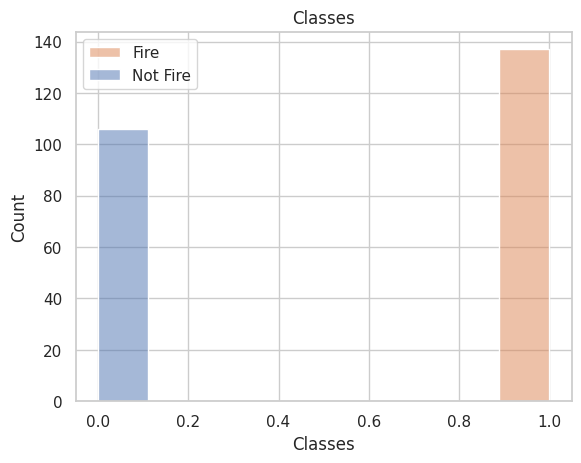

In [40]:
dftemp = dftemp = df.drop(['Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

REPORT

Weather System Report

Temperature Highest Fire counts happened between 30-37 degree Celsius
Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.
Relative Humidity highest fire count happened when the RH is between 50 to 80%.

FWI System Components Report

FWI (Canadian Forest Fire Weather Index)

->Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

->Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

->Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

->Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

->Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

->Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.bold text

In [41]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [45]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [47]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000


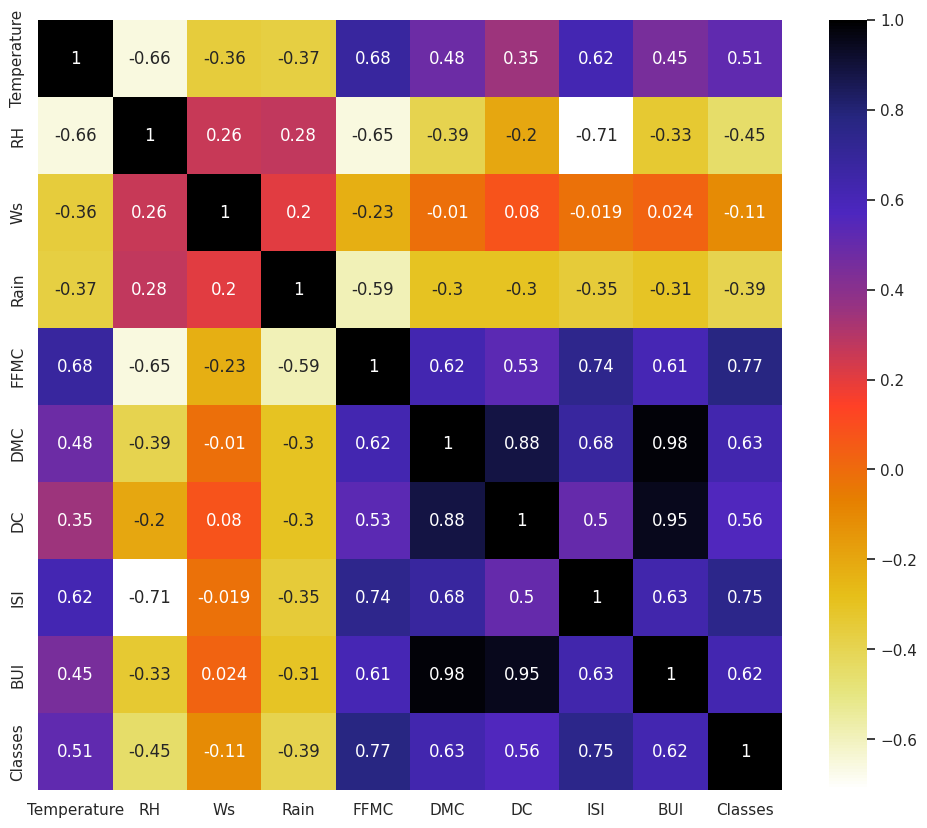

In [48]:
#Checking multicollinearlity and remove highly corrrelated features

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(X_train, 0.75)

In [51]:
# features which has correlation more than 0.75
corr_features

{'BUI', 'Classes', 'DC'}

In [52]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 7), (61, 7))

In [53]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [54]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

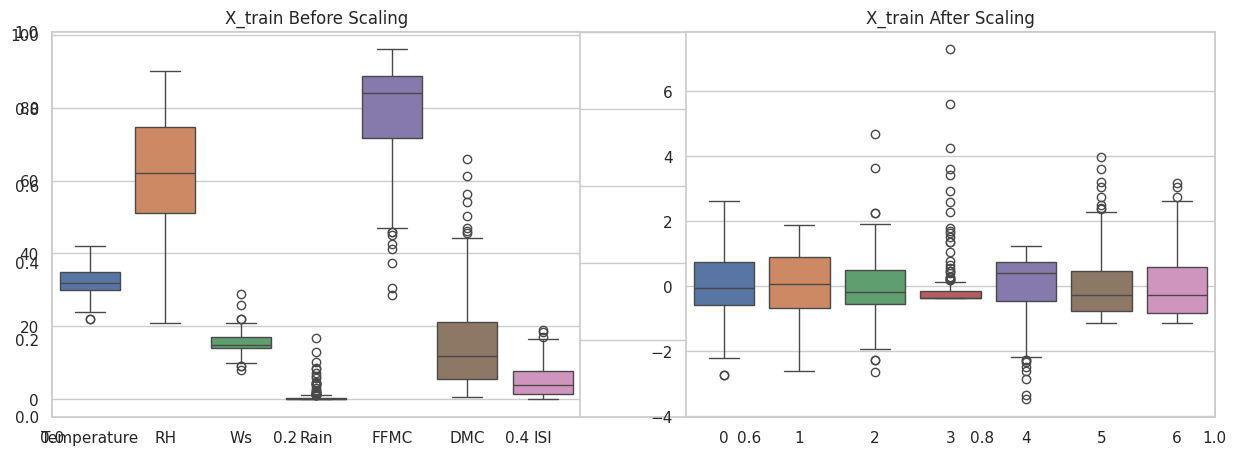

In [55]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [57]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))


Linear Regression
R2 Score value: 0.9650
MAE value: 0.7124


In [58]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.9377
MAE value: 1.1209


In [59]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9640
MAE value: 0.7309


In [60]:
# Support Vector Regressor

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.9346
MAE value: 0.8915


In [61]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9841
MAE value: 0.5431


In [62]:
#Hyperparameter Tuning

param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [63]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9750
MAE value: 0.6899


# Model Selection For **Classification**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [65]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 10), (73, 10))

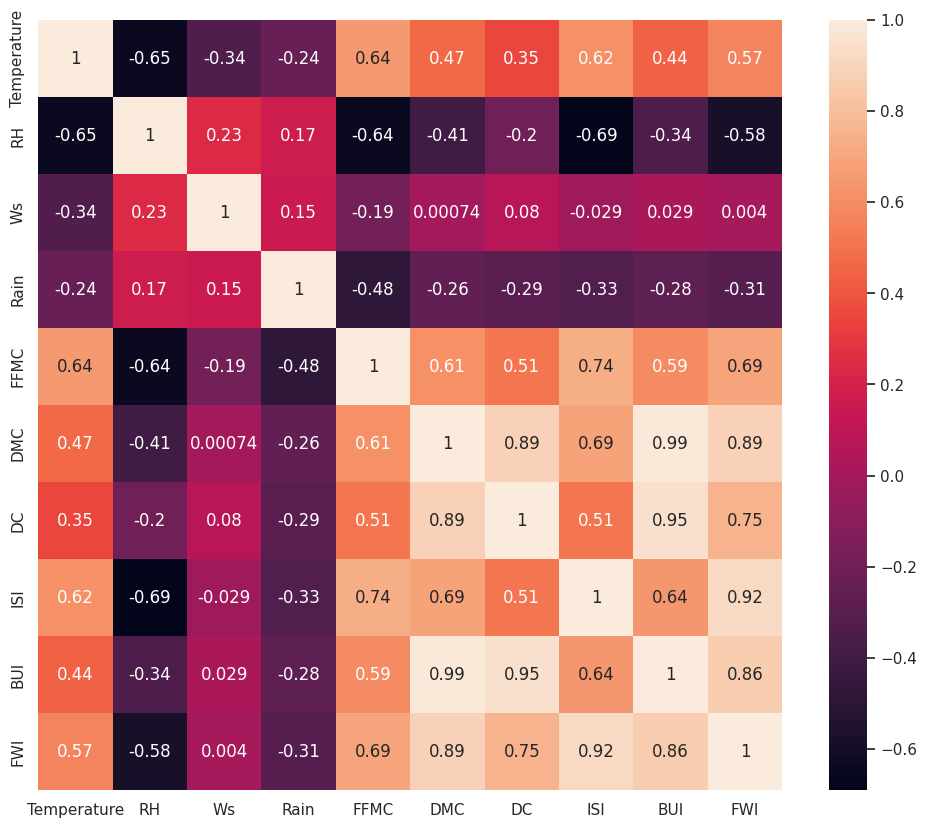

In [67]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [68]:
corr_features = correlation(X_train, 0.75)

In [69]:
corr_features

{'BUI', 'DC', 'FWI'}

In [70]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [71]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [72]:
#Logistic Regression

loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.98      0.94      0.96        48

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



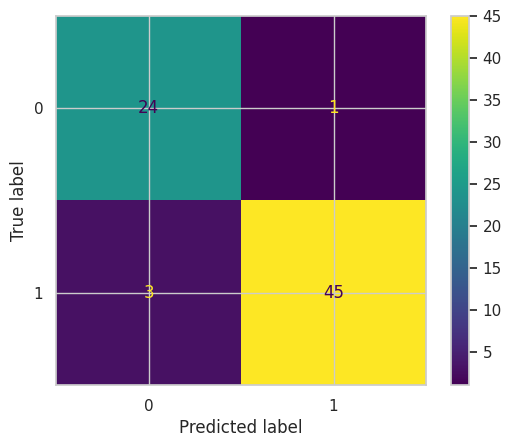

In [73]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

In [74]:
#Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



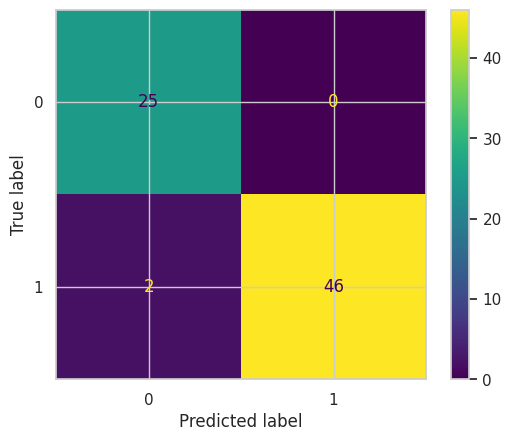

In [75]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

In [77]:
#Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



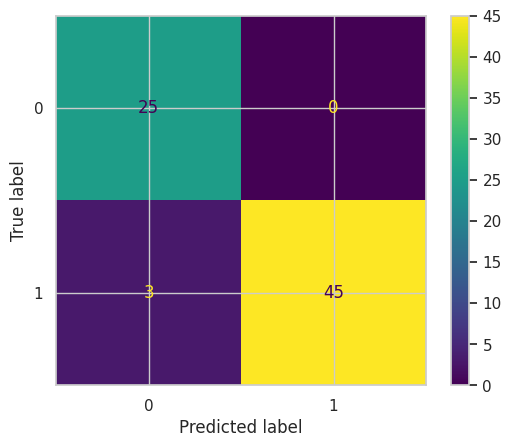

In [78]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

In [79]:
#XGboost Model

xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73

